In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [ ]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)

In [ ]:
y_pred

array([ True, False])

In [ ]:
# Perceptron is equivalent to a SGD Classifier with loss='perceptron', no regularization and a constant learning rate equal to 1.

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss='perceptron',penalty=None,learning_rate='constant',eta0=1,random_state=42)
sgd_clf.fit(X, y)
assert(sgd_clf.coef_ == per_clf.coef_).all()
assert(sgd_clf.intercept_ == per_clf.intercept_).all()

In [ ]:
# Regression MLPs

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

In [ ]:
rmse

0.5053326657968679

In [ ]:
# Classification MLPs

In [ ]:
from sklearn.neural_network import MLPClassifier
iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000, random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

In [ ]:
# Implementing MLPs with Keras

In [ ]:
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

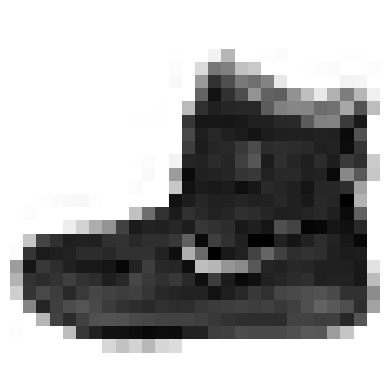

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='binary')
plt.axis("off")
plt.show()

In [ ]:
class_names = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Ankle boot'

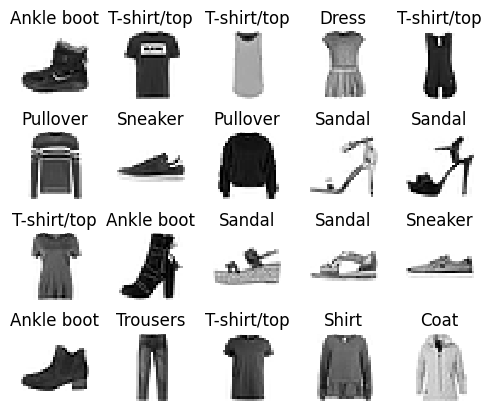

In [ ]:
n_rows = 4
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))  #10 ferqli

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

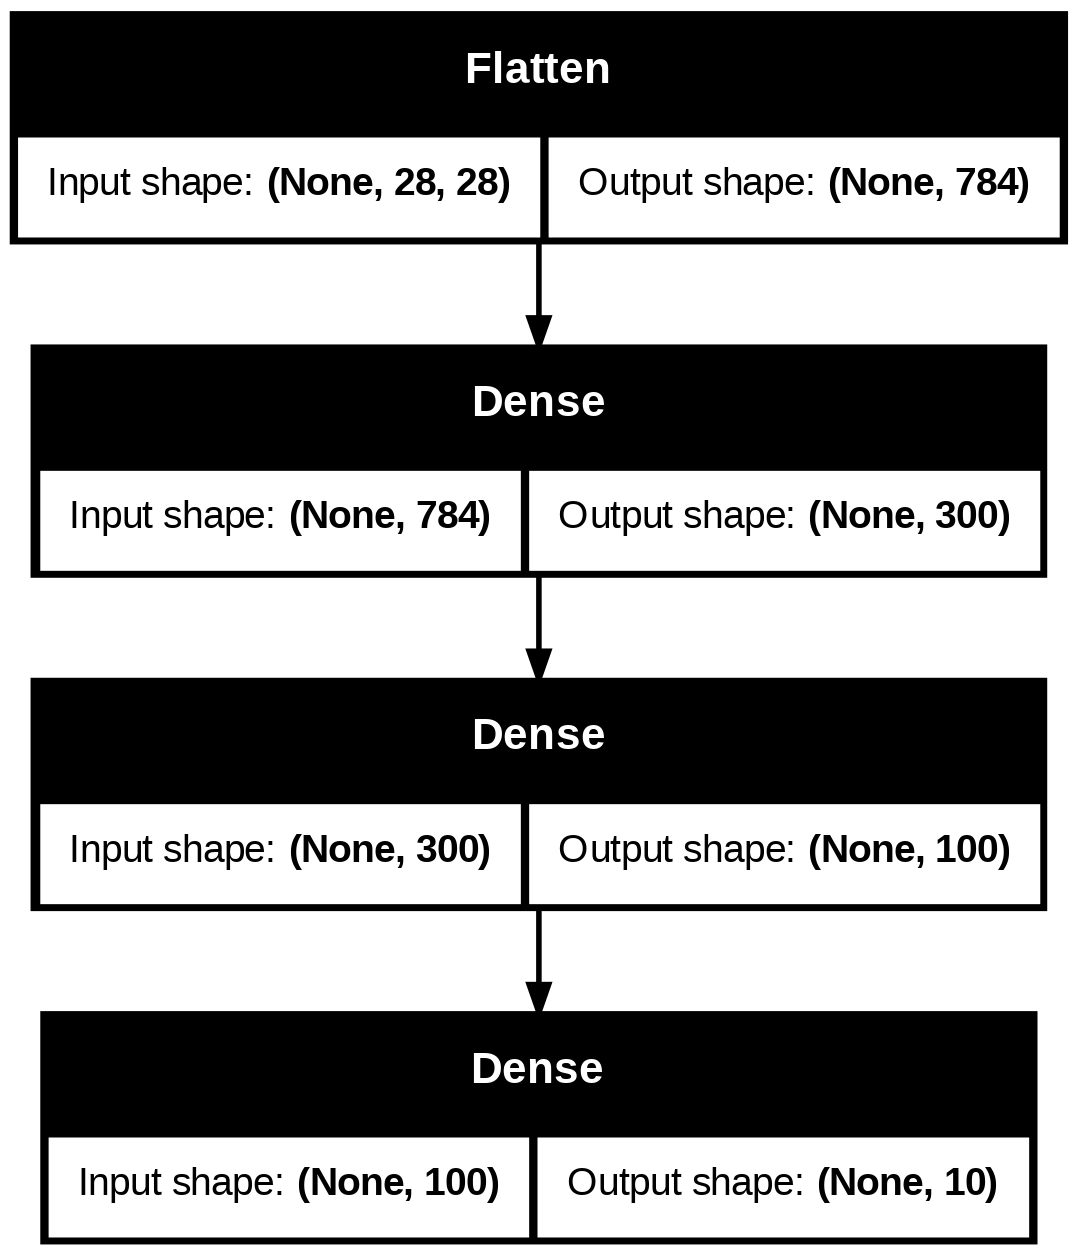

In [ ]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('dense') is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[-0.0039557 , -0.01746994,  0.03910016, ..., -0.00991606,
         0.01494232,  0.06222147],
       [-0.04710172, -0.00973159, -0.00015184, ..., -0.02087203,
         0.05037712, -0.02854718],
       [ 0.06029224, -0.01932032,  0.07141416, ..., -0.06702232,
         0.01554785, -0.01711421],
       ...,
       [ 0.03997142, -0.03294927,  0.0458819 , ..., -0.01632615,
        -0.0666094 ,  0.01019164],
       [ 0.01650283, -0.02840657, -0.00702084, ..., -0.0396074 ,
        -0.05938563, -0.04556672],
       [-0.03497261, -0.04526145, -0.06477915, ...,  0.00376803,
        -0.0420893 ,  0.03349068]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
weights.shape #yuxaridaki shekilde sagdakilar

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
# Compiling the model

In [ ]:
model.compile(loss='sparse_categorical_crossentrophy', optimizer='sgd',metrics=['accuracy'])

In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(), metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
# Log hansi terefde 1 olsa, onda hemin teref 1-1=0 olub silinirdi.

In [ ]:
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10) # sparse formatindan categorical formata cevirir

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], axis=1)

array([0, 5, 1, 0])

In [ ]:
# Training and evaluating the model

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.9806 - sparse_categorical_accuracy: 0.6905 - val_loss: 0.5059 - val_sparse_categorical_accuracy: 0.8278
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.5059 - sparse_categorical_accuracy: 0.8279 - val_loss: 0.4574 - val_sparse_categorical_accuracy: 0.8400
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.4536 - sparse_categorical_accuracy: 0.8442 - val_loss: 0.4344 - val_sparse_categorical_accuracy: 0.8480
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.4241 - sparse_categorical_accuracy: 0.8539 - val_loss: 0.4195 - val_sparse_categorical_accuracy: 0.8512
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.4027 - sparse_categorical_accuracy: 0.8605 - val_loss: 0.4092 - val_sparse_categorical_accuracy: 0.8516
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3858 - sparse_categorical_accuracy: 0.8660 - val_loss: 0.4012 - val_sparse_categorical_accura

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


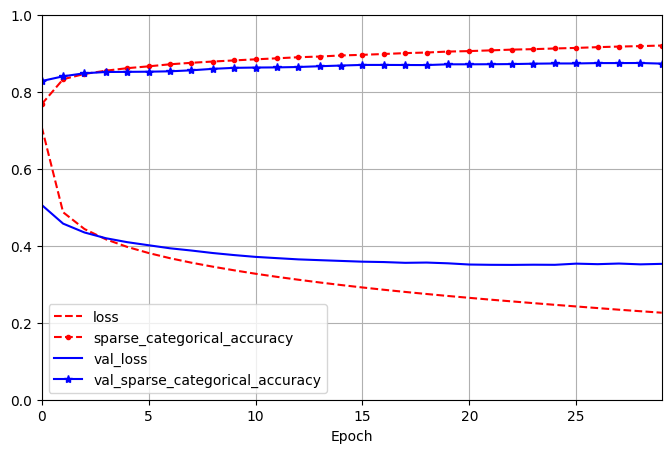

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel='Epoch', style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [ ]:
history.history

{'loss': [0.708385169506073,
  0.48696231842041016,
  0.44333651661872864,
  0.4166514575481415,
  0.39691993594169617,
  0.38103440403938293,
  0.36756646633148193,
  0.35594528913497925,
  0.34562528133392334,
  0.33611902594566345,
  0.3272315263748169,
  0.31917470693588257,
  0.3117162883281708,
  0.30457040667533875,
  0.29790350794792175,
  0.2915925979614258,
  0.2856155037879944,
  0.27998271584510803,
  0.27463001012802124,
  0.2694808542728424,
  0.26464247703552246,
  0.2598787248134613,
  0.2553482949733734,
  0.25087520480155945,
  0.24648691713809967,
  0.24224434792995453,
  0.23803319036960602,
  0.23381420969963074,
  0.22988241910934448,
  0.22602109611034393],
 'sparse_categorical_accuracy': [0.767727255821228,
  0.8324363827705383,
  0.8461818099021912,
  0.8546181917190552,
  0.8611636161804199,
  0.8659090995788574,
  0.8712727427482605,
  0.875109076499939,
  0.8784000277519226,
  0.8813636302947998,
  0.8841272592544556,
  0.8867636322975159,
  0.88956362009048

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3714 - sparse_categorical_accuracy: 0.8703


[0.3703196942806244, 0.8711000084877014]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.35, 0.  , 0.01, 0.  , 0.64],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
# np.argmax() ile tapa bilerik hansi kateqoriyadadi
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trousers'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

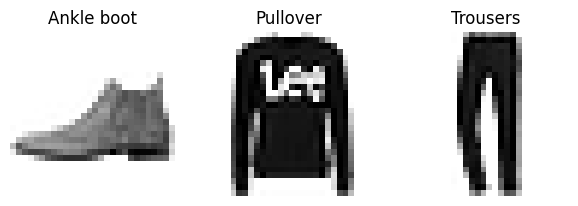

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
  plt.subplot(1, 3, index + 1)
  plt.imshow(image, cmap='binary', interpolation='nearest')
  plt.axis('off')
  plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [ ]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - RootMeanSquaredError: 1.3075 - loss: 1.8418 - val_RootMeanSquaredError: 0.6271 - val_loss: 0.3932
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6408 - loss: 0.4112 - val_RootMeanSquaredError: 0.5875 - val_loss: 0.3452
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6060 - loss: 0.3674 - val_RootMeanSquaredError: 0.6533 - val_loss: 0.4269
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5912 - loss: 0.3497 - val_RootMeanSquaredError: 0.5629 - val_loss: 0.3169
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5827 - loss: 0.3396 - val_RootMeanSquaredError: 0.8421 - val_loss: 0.7091
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5763 - loss: 0.3323 - val_RootMeanSquaredError: 0.8767 - val_loss: 0.7685
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5697 - los

In [ ]:
rmse_test

0.5365886092185974

In [ ]:
y_pred

array([[0.41241044],
       [1.2302372 ],
       [4.61839   ]], dtype=float32)

# Functional API

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [ ]:
normalized.shape

(None, 8)

In [ ]:
hidden2.shape

(None, 30)

In [ ]:
concat.shape

(None, 38)

In [ ]:
model.get_weights()

[array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 0,
 array([[ 2.24661738e-01,  2.32004553e-01, -1.69363007e-01,
          8.45639408e-02,  5.88747859e-03, -6.23518527e-02,
         -3.25153649e-01,  1.62203103e-01,  4.13553715e-02,
         -1.04353726e-02,  2.52201170e-01, -1.52938768e-01,
          3.89259309e-01,  1.68342382e-01, -2.97202170e-01,
          1.10276192e-01,  3.00431848e-02, -2.40111023e-01,
          4.13923264e-02,  2.07591653e-02, -1.88040584e-01,
         -1.91293955e-02, -4.94628549e-02,  2.00741082e-01,
         -2.46508390e-01,  1.85174972e-01, -4.41870093e-02,
         -3.65477920e-01,  1.30653173e-01, -3.86704206e-02],
        [-3.47671360e-01,  3.88026863e-01, -1.92610368e-01,
         -2.42263183e-01, -1.10919178e-02,  2.94274956e-01,
         -1.52908921e-01, -2.66277909e-01, -3.91784459e-01,
          2.21663862e-01, -1.95853531e-01,  8.60346556e-02,
          3.63308638e-01,  1.42449111e-01

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 8)              │             17 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 30)             │            270 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 30)             │            930 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ normalization[0][0],   │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.5092 - loss: 2.4211 - val_RootMeanSquaredError: 0.8177 - val_loss: 0.6686
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.7034 - loss: 0.4962 - val_RootMeanSquaredError: 0.6611 - val_loss: 0.4371
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6455 - loss: 0.4171 - val_RootMeanSquaredError: 1.4568 - val_loss: 2.1222
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6249 - loss: 0.3909 - val_RootMeanSquaredError: 1.2289 - val_loss: 1.5101
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6132 - loss: 0.3762 - val_RootMeanSquaredError: 1.8261 - val_loss: 3.3348
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6058 - loss: 0.3672 - val_RootMeanSquaredError: 2.0740 - val_loss: 4.3014
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6033 - loss: 0.3642 -

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(3, 8))
  warnings.warn(msg)


In [ ]:
tf.random.set_seed(42)

In [ ]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

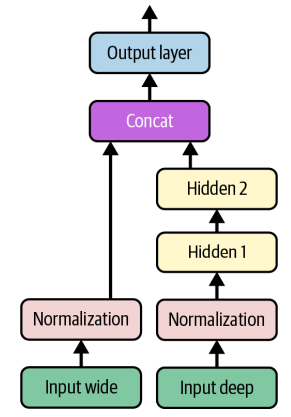

In [ ]:
from IPython.display import Image
Image(filename='handling_multiple_inputs.png')

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 0.6563 - loss: 0.4309 - val_RootMeanSquaredError: 0.7840 - val_loss: 0.6147
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6353 - loss: 0.4038 - val_RootMeanSquaredError: 0.7581 - val_loss: 0.5748
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6245 - loss: 0.3902 - val_RootMeanSquaredError: 0.9471 - val_loss: 0.8969
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6161 - loss: 0.3799 - val_RootMeanSquaredError: 1.0784 - val_loss: 1.1630
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6092 - loss: 0.3713 - val_RootMeanSquaredError: 1.3658 - val_loss: 1.8654
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6055 - loss: 0.3668 - val_RootMeanSquaredError: 1.5041 - val_loss: 2.2623
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6001 - los

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
tf.random.set_seed(42)

In [ ]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=('mse','mse'), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError", 'RootMeanSquaredError'])

In [ ]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - dense_2_RootMeanSquaredError: 1.5187 - dense_2_loss: 2.3992 - dense_3_RootMeanSquaredError: 1.7942 - dense_3_loss: 3.3398 - loss: 2.4933 - val_dense_2_RootMeanSquaredError: 0.8023 - val_dense_2_loss: 0.6435 - val_dense_3_RootMeanSquaredError: 1.3736 - val_dense_3_loss: 1.8861 - val_loss: 0.7680
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - dense_2_RootMeanSquaredError: 0.7833 - dense_2_loss: 0.6146 - dense_3_RootMeanSquaredError: 0.8495 - dense_3_loss: 0.7224 - loss: 0.6254 - val_dense_2_RootMeanSquaredError: 0.7011 - val_dense_2_loss: 0.4914 - val_dense_3_RootMeanSquaredError: 0.8912 - val_dense_3_loss: 0.7941 - val_loss: 0.5218
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_2_RootMeanSquaredError: 0.6996 - dense_2_loss: 0.4897 - dense_3_RootMeanSquaredError: 0.7734 - dense_3_loss: 0.5984 - loss: 0.5006 - val_dense_2_RootMeanSquaredError: 0.7474 - val_dense_2_loss: 0.5585 - val_dense_3_RootMeanSquaredError: 0.7

In [ ]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_2_RootMeanSquaredError: 0.5808 - dense_2_loss: 0.3375 - dense_3_RootMeanSquaredError: 0.6396 - dense_3_loss: 0.4092 - loss: 0.3447


In [ ]:
eval_results

[0.3397803008556366,
 0.33296850323677063,
 0.4018198251724243,
 0.5769910216331482,
 0.6336687803268433]

In [ ]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


In [ ]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
